# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
#import warnings
#warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [ ]:
# run this cell to upload file using GUI if you are using google colab

# from google.colab import files
# files.upload()

{}

This assignment is being done in Google Colab so above cell is commented out and data upload through Google Drive is done

In [ ]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/My Drive/')

In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/NNDLDataset')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('prices.csv')

## Question 2

### Drop null
- Drop null values if any

In [ ]:
# Check if any NULL in the data
pd.DataFrame( df.isnull().sum(), columns= ['Number of Null values'])

,Number of Null values
date,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [ ]:
df.drop(['date','volume','symbol'],axis =1, inplace = True)

In [ ]:
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


## Question 3

### Print the dataframe
- print the modified dataframe

In [ ]:
df.head(10)

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002
5,115.510002,115.550003,114.500000,116.059998
6,116.459999,112.849998,112.589996,117.070000
7,113.510002,114.379997,110.050003,115.029999
8,113.330002,112.529999,111.919998,114.879997
9,113.660004,110.379997,109.870003,115.870003


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [ ]:
X = df.drop('close', axis=1)
y = df['close']

In [ ]:
X.head()

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002


In [ ]:
y.head()

0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64

## Question 4

### Create train and test sets
- Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=4)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [ ]:
type(X_train_scaled)


numpy.ndarray

In [ ]:
type(y_train)

pandas.core.series.Series

Since scaled X is already in ndarray and 'y' is in Pandas Series, we only need to convert y to Numpy Array

In [ ]:
import numpy as np

In [ ]:
y_train = np.array(y_train)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_test = np.array(y_test)

In [ ]:
type(y_test)

numpy.ndarray

Both train and test for Target y is now in type 'ndarray'

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [ ]:
model = Sequential([Flatten(),Dense(1, activation = 'linear')])

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [ ]:
model.compile(optimizer='sgd',loss ='mse')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

Suggested by Faculty to use test set as validation set for this Lab assignment. During project we should create a separate validation Set. Test Set should be kept for final validation only.

In [ ]:
model.fit(X_train_scaled, y_train,
          validation_data=(X_test_scaled,y_test),
          epochs=50,
          batch_size=128)

Epoch 1/50
4656/4656 [==============================] - 10s 2ms/step - loss: 262.2390 - val_loss: 0.9774
Epoch 2/50
4656/4656 [==============================] - 8s 2ms/step - loss: 1.0093 - val_loss: 0.9803
Epoch 3/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9728 - val_loss: 0.9553
Epoch 4/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9670 - val_loss: 0.9534
Epoch 5/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9314 - val_loss: 0.9626
Epoch 6/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9631 - val_loss: 0.9364
Epoch 7/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9290 - val_loss: 0.9343
Epoch 8/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9417 - val_loss: 0.9304
Epoch 9/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.9574 - val_loss: 0.9151
Epoch 10/50
4656/4656 [==============================] - 8s 2ms/step - loss: 0.

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [ ]:
model.evaluate(X_test_scaled,y_test)

7981/7981 [==============================] - 8s 1ms/step - loss: 0.7139


0.7139092087745667

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [ ]:
model.predict(scaler.transform([[123.430000, 122.30999, 116.250000]]))

array([[119.81218]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [ ]:
import tensorflow as tf

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

### Change train and test labels into one-hot vectors

In [ ]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY= tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
trainY.shape

(60000, 10)

### Build the Graph

### Initialize model, reshape & normalize data

In [ ]:
#Clear out model from current memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [ ]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add a Dropout layer with p=0.25
model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

###Also add callback, such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [ ]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#Add Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Print model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
______________________________________________

###Train your model, use test data as validation set

In [ ]:
history = model.fit(x_train, trainY,validation_data= (x_test,testY), epochs= 10,batch_size= 32, callbacks=callback)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6320 - accuracy: 0.7784 - val_loss: 0.4193 - val_accuracy: 0.8504
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3975 - accuracy: 0.8541 - val_loss: 0.3935 - val_accuracy: 0.8576
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3609 - accuracy: 0.8664 - val_loss: 0.3619 - val_accuracy: 0.8721
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3391 - accuracy: 0.8750 - val_loss: 0.3591 - val_accuracy: 0.8726
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3152 - accuracy: 0.8821 - val_loss: 0.3608 - val_accuracy: 0.8753
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.8904 - val_loss: 0.3465 - val_accuracy: 0.8774
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2856 - accuracy: 0.8924 - val_loss: 0.3623 - val_accuracy:

###Predict Labels

In [ ]:
#lets first predict for all classes
model.predict(x_test)

array([[8.2294277e-10, 2.7156267e-13, 1.8470135e-10, ..., 1.4085554e-03,
        3.9113304e-09, 9.9848688e-01],
       [4.4459043e-08, 1.9809226e-20, 9.9978846e-01, ..., 4.0204661e-22,
        3.0980406e-15, 2.0845653e-22],
       [3.9952860e-14, 1.0000000e+00, 4.7030039e-17, ..., 1.0034041e-31,
        2.9242274e-19, 0.0000000e+00],
       ...,
       [2.6107433e-03, 7.1162532e-08, 1.5719852e-04, ..., 7.9952521e-08,
        9.9557930e-01, 6.9137172e-09],
       [5.2008192e-13, 1.0000000e+00, 1.7059627e-16, ..., 2.8947404e-25,
        3.5824085e-15, 5.9912981e-26],
       [4.5011923e-08, 1.5210066e-11, 2.0171649e-06, ..., 1.7476974e-03,
        6.4031644e-07, 5.9473064e-06]], dtype=float32)

In [ ]:
# Lets take the index of maximum probability for each row
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
# Print the Class index for all test items
y_pred

array([9, 2, 1, ..., 8, 1, 5])

###Print Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[873,   3,  24,  27,   1,   1,  66,   0,   5,   0],
       [  4, 970,   2,  19,   3,   0,   2,   0,   0,   0],
       [ 16,   0, 805,  15, 105,   1,  57,   0,   1,   0],
       [ 19,   4,   9, 920,  23,   0,  21,   1,   3,   0],
       [  2,   1,  77,  39, 825,   1,  54,   0,   1,   0],
       [  0,   0,   0,   1,   0, 951,   0,  32,   0,  16],
       [132,   1, 105,  33,  78,   0, 644,   0,   7,   0],
       [  0,   0,   0,   0,   0,   8,   0, 968,   0,  24],
       [  3,   1,   3,   8,   3,   4,  14,   7, 957,   0],
       [  1,   0,   0,   0,   0,  10,   1,  43,   0, 945]])

###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

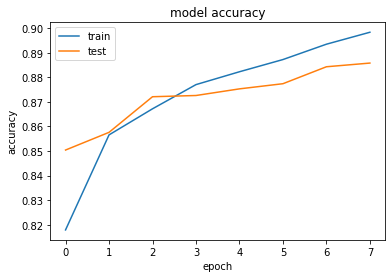

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


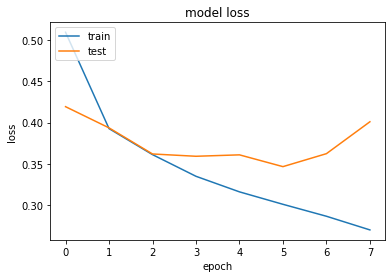

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()